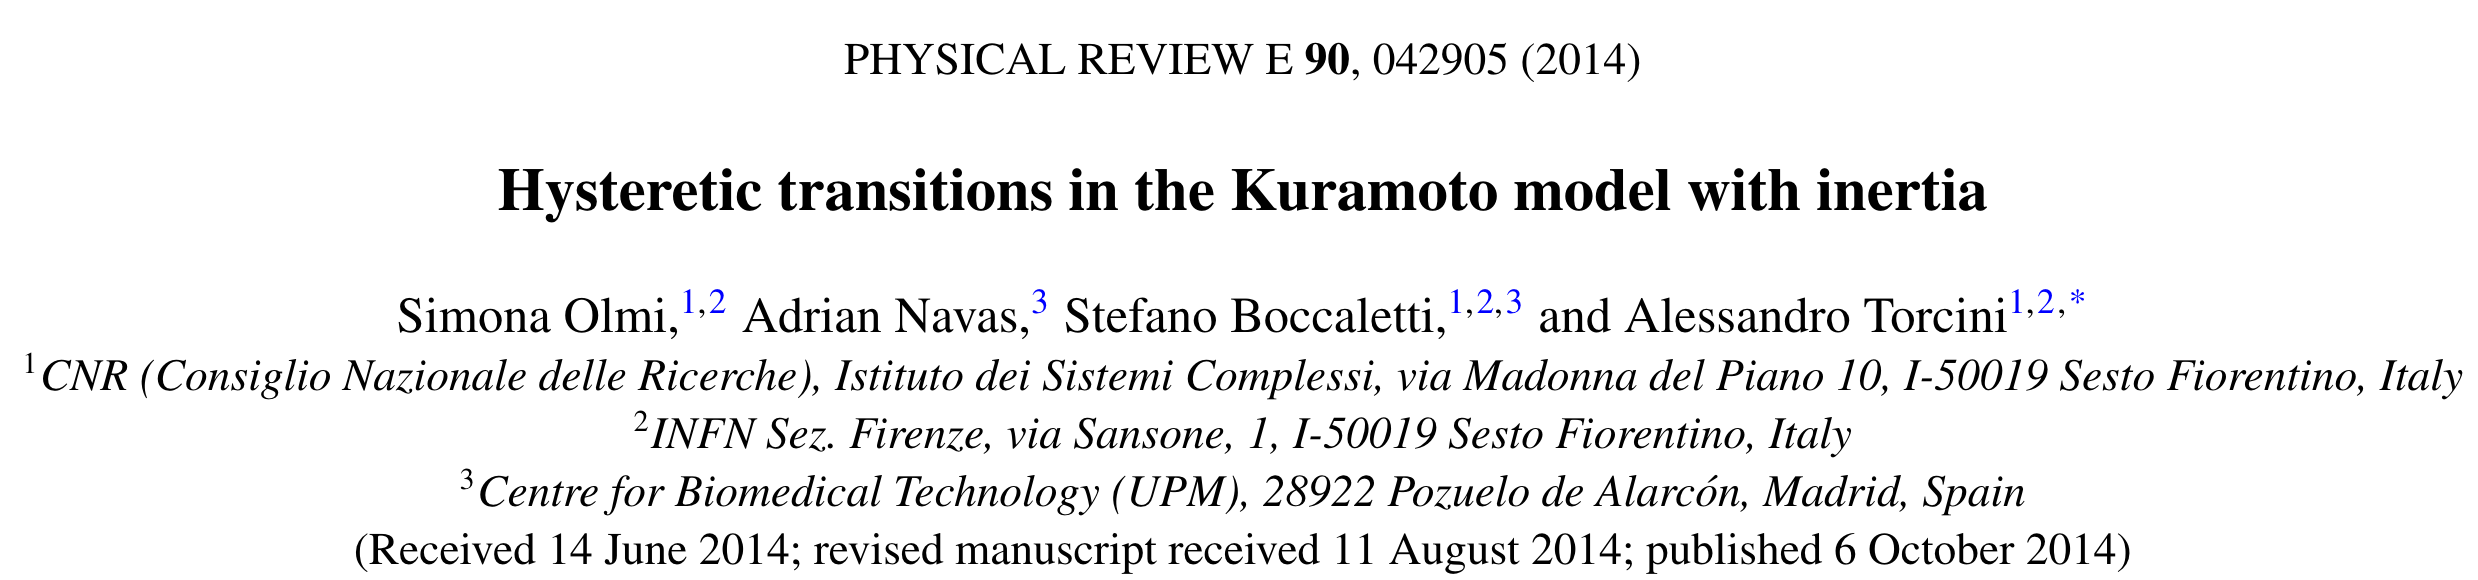

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.gen_Distribution import Quantile_Lorentzian as Q_Lorentzian

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [13]:
import numpy as np
import scipy.stats as scs
from scipy.integrate import quad
from scipy.special import erfinv

$\frac{1}{K^{MF}_1} = \frac{πg(0)}{2} − \frac{m}{2} ∫^∞ _{−∞} \frac{g(\Omega)d\Omega}{1 + m^2\Omega^2}$

In [26]:
g_o = lambda o,mean=0, sigma=1 : scs.norm.pdf(o, mean, sigma)

In [27]:
def get_Kc1_I(m):
    KcI = (np.pi * g_o(0))/2
    f = lambda o:g_o(o,0,1)/(1+(m**2)*(o**2))
    integrand = quad(f,-3,3)[0]
    KcI2 = -(m/2)*integrand
    Kc_1MF = 1/(KcI+KcI2)
    return Kc_1MF

def get_Kc1_S(m,omega):
    domega = np.diff([omega[0],*omega])
    KcI = (np.pi * g_o(0))/2

    # integrand = np.mean([g/(1+(m**2)*(o**2)) for g,o in zip(P,omega_[1:])])
    integrand = np.sum([g_o(o)*do/(1+(m**2)*(o**2)) for o,do in zip(omega,domega)])
    
    KcI2 = -(m/2)*integrand
    Kc_1MF = 1/(KcI+KcI2)
    return Kc_1MF


def get_Kc1_Shist(m,omega):
    P,omega_ = np.histogram(omega, bins=100,density=True)
    domega = np.diff(omega_)
    KcI = (np.pi * g_o(0))/2

    integrand = np.sum([g*do/(1+(m**2)*(o**2)) for g,o,do in zip(P,omega_[1:],domega)])
    
    KcI2 = -(m/2)*integrand
    Kc_1MF = 1/(KcI+KcI2)
    return Kc_1MF

In [106]:
m

1

In [107]:
get_Kc1_Shist(m,omega),get_Kc1_S(m,omega) , get_Kc1_I(m)

(3.411161576869126, 3.3189035441811017, 3.3452253975824093)

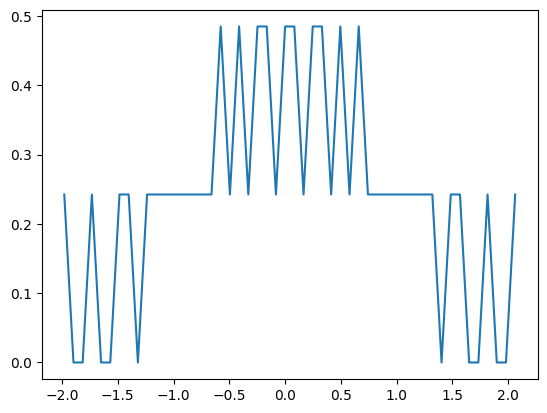

In [108]:
P,omega_= np.histogram(omega, bins=len(omega),density=True)
plt.plot(omega_[1:],P)

In [109]:
fx = lambda x: 1

In [110]:
xs = np.linspace(0,1)
dxs = np.diff(xs)
np.sum([fx(x)*dx for x,dx in  zip(xs,dxs)])

1.0

In [111]:
get_Kc1_I(10), get_Kc1_S(10,omega),get_Kc1_Shist(10,omega)

(21.259138335088565, 21.250122210520733, 177.40400943247306)

In [112]:
f = lambda o:g_o(o,0,1)/(1+(m**2)*(o**2))
integrand,acc = quad(f,-np.inf,np.inf)
integrand

0.6556795424187986

In [113]:
N =  5000
m = 10
theta_random,omega,Kc = Normal(N,0,1,seed=10)
omega -= np.mean(omega)
omega = np.sort(omega)

In [114]:
omega_ , P = np.histogram(omega, bins=1000)
KcI = (np.pi * g_o(0))/2
np.mean([g/(1+(m**2)*(o**2)) for g,o in zip(P,omega_[1:])])

0.15820447000590607

In [115]:
np.mean([g_o(o)/(1+(m**2)*(o**2)) for g,o in zip(P,omega_[1:])])


0.12007306970022678

In [116]:
f = lambda o:g_o(o)/(1+m**2*o**2)
quad(f,-np.inf,np.inf)[0]

0.11592623996188972

In [117]:
np.mean([g_o(o)/(1+m**2*o**2) for o in omega])

0.0448147868590665

In [118]:
P, omega_ = np.histogram(omega, bins=N*2,density=True)
KcI = (np.pi * g_o(0))/2
np.mean([g/(1+m**2*o**2) for g,o in zip(P,omega_[1:])])

0.01660366680637013

In [119]:
get_Kc1_S(m=10,omega=omega)

21.247129947315646

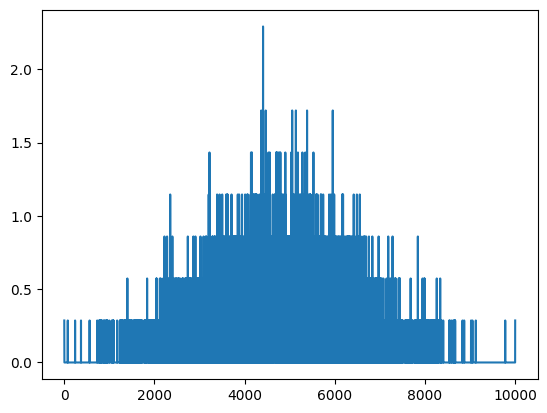

In [120]:
plt.plot(P)

In [121]:
len(omega_)

10001

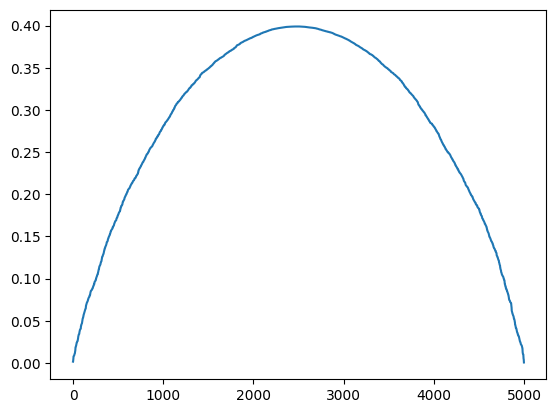

In [122]:
plt.plot(g_o(omega))

In [123]:
np.sum([g/(1+(m**2)*(o**2)) for g,o in zip(P,omega_)])

166.02403018766898

In [124]:
theta_random,omega,Kc = Normal(N,0,1,seed=seed)

In [125]:
get_Kc1_L = lambda m,σ: 2*σ *(1 + m*σ )

In [126]:
get_Kc1_L(m=10,σ = 1)

22

In [127]:
get_Kc1_I(m=10)

21.259138335088565

In [128]:
get_Kc1_S(m=0.95,omega=omega)

-0.06277505762782243

In [131]:
for m in [1,2,3,4,5,6,7,8,9,10,11,12]:
    KcS = get_Kc1_S(m,omega)
    KcSH = get_Kc1_Shist(m,omega)
    KcI = get_Kc1_I(m)
    K = KcS*(1-m/(N**(0.2)))
    print(KcS,KcSH,KcI,K)

3.3189035441811017 3.411161576869126 3.3452253975824093 1.8011521865675757
5.272089466962122 5.5722679038282825 5.303997622614841 0.450183172052875
7.251975867355326 7.96139784557145 7.287493456916795 -2.6971197344346076
9.241116981094665 10.720046162668321 9.278465972559284 -7.662920942529307
11.235372547368158 14.146710792668719 11.272670013795349 -14.454590583617101
13.233255710721439 18.80431163527895 13.268560889955813 -23.07655242903289
15.234099117858541 25.840282301903674 15.265442673111874 -33.53231429924982
17.237530059974844 38.08289523701473 17.262955844862393 -45.82494657343032
19.24316342180974 65.1950032419434 19.260895994875533 -59.95679920890082
21.250122210520733 177.40400943247306 21.259138335088565 -75.9277601989214
23.2561282405997 -328.30179046511796 23.25760237888682 -93.73046601905637
25.2560465378911 -92.11346446948777 25.256233887354384 -113.34056554397999


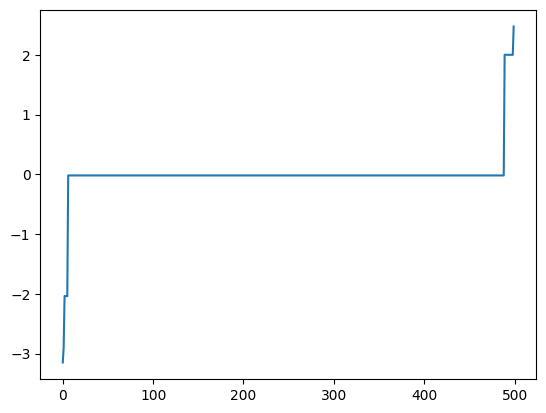

In [175]:
plt.plot(avg_dtheta[-1])

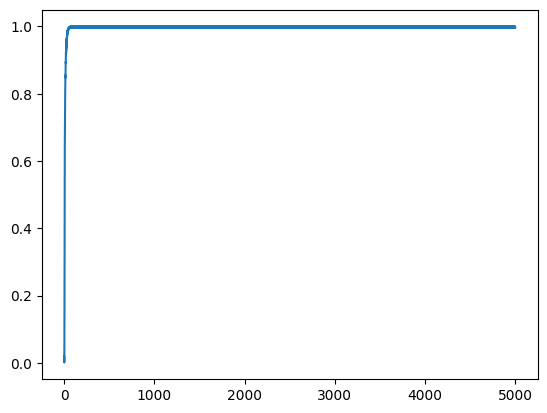

In [238]:
plt.plot(t,rs)

In [239]:
get_Kfc = lambda m,sigma=1:m*(np.pi)**2*sigma**2*(3.0/4)**2
# get_Kfc = lambda m,sigma=1:m*(np.pi)**2*sigma**2*(2/4)**2
get_Kfc = np.vectorize(get_Kfc)

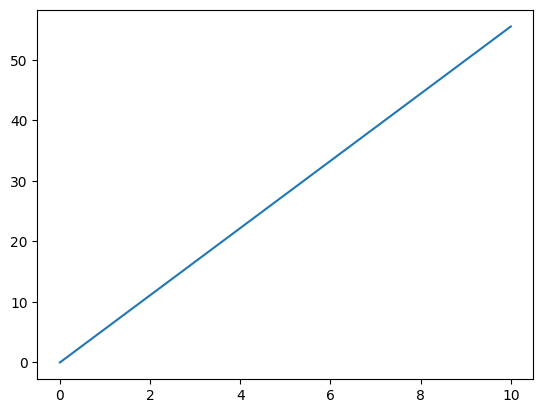

In [240]:
m = np.linspace(0,10,20)
plt.plot(m,get_Kfc(m,1))

In [28]:
1-2.54/3.53

0.2804532577903682

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [2]:
xs_f = [0.28,0.345,0.518,0.677,1.0,1.43,2,2.773,3.5,4]
ys_f = [0.35,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.915,0.926]

In [9]:
xnew = np.linspace(0.28,4,20)
f_quadr = interpolate.interp1d(xs_f, ys_f, kind='quadratic') # cubic
y_new_quadr = f_quadr(xnew)

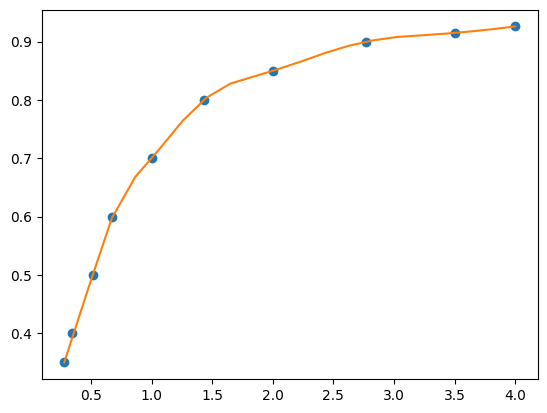

In [10]:

plt.plot(xs_f, ys_f, "o", xnew, y_new_quadr)
plt.show()

In [141]:
xs_f = [0.28,0.345,0.518,0.677,1.0,1.43,2,2.773,3.5,4]
ys_f = [0.35,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.915,0.926]

xs_inter
xs_f,ys_f = map(np.array,[xs_f,ys_f])

In [142]:
func = lambda x,a,b: a*np.log(x) +b
func = lambda x,a,b: x**a +b

In [143]:
from scipy.optimize import curve_fit

In [173]:
func = lambda x,a,b: a*np.log(x) +b
# func = lambda x,a,b: x**a +b
# func = lambda x,a,b: a*x**0.5 +b

In [174]:
popt, pcov = curve_fit(func,xs_f,ys_f)

In [175]:
popt

array([0.22518794, 0.66426782])

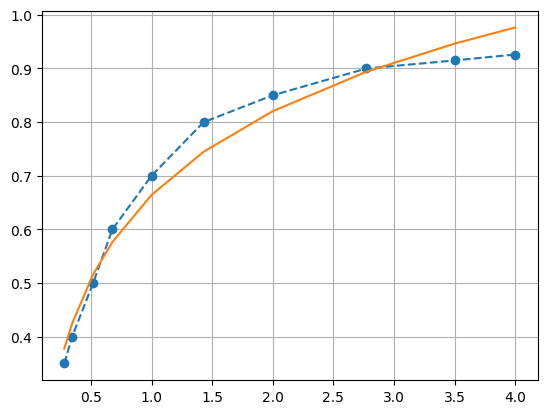

In [176]:
# plt.plot(xs,ys,'o--')
plt.plot(xs_f,ys_f,'o--')
plt.plot(xs_f,func(xs_f,*popt))
# plt.plot(xs,0.225*np.log(xs)+0.66)
# plt.plot(xs,0.225*np.log(xs)+0.66)
# plt.xscale('log')
# plt.yscale('log')
# plt.loglog()
plt.grid()

In [163]:
ms = [1,2,3,4,5,6,7,8,9,10]
xm = [get_Kc1_S(m,omega) for m in ms] 

In [204]:
N = 2000

In [30]:
plt.plot(ms,[get_Kc1_S(m,omega)*(1-func(m/(N**0.2),*popt)) for m in ms])

NameError: name 'ms' is not defined

In [217]:
rsm = {}
avgs = {}
seed =10
N =  5000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega -= np.mean(omega)
omega = np.sort(omega)
init_dtheta = np.zeros_like(omega)
for m in [1,2,3,4,5,6,7,8,9,10,11,12]:
    t = np.arange(0,5000,0.1)
    KcS = get_Kc1_S(m,omega)
    KcSH = get_Kc1_Shist(m,omega)
    KcI = get_Kc1_I(m)
    Kc = get_Kc1_S(m,omega)*(1-func(m/(N**0.2),*popt))
    print(KcS,KcSH,KcI,Kc)
    K = Kc
    to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
    theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
    new_theta = to_ppi(theta)
    dtheta_c = np.cumsum(dtheta,axis=0)
    sum_time = 500
    avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
    avgs[m] = avg_dtheta[-1]
    rsm[m]=rs

3.345939834916634 3.354401331343416 3.3452253975824093 2.406821596842839
5.305232445970147 5.3282372804919875 5.303997622614841 2.988106581762704
7.289725984249327 7.2910516356733535 7.287493456916795 3.440253378134014
9.281969535898028 9.201545551704028 9.278465972559284 3.7791469213162165
11.27723757386013 11.070559172998106 11.272670013795349 4.024846217260583
13.273383320003665 12.936955000702687 13.268560889955813 4.192310450836941
15.26914015392442 14.852882038696203 15.265442673111874 4.292621319661714
17.263686361569675 16.87862084821677 17.262955844862393 4.334235961112417
19.25647362140905 19.0854751555576 19.260895994875533 4.323801244287461
21.247129947315646 21.565405775156048 21.259138335088565 4.266670663820476
23.235397851422785 24.448283162072784 23.25760237888682 4.167243519699445
25.22109646075049 27.931723286220667 25.256233887354384 4.029196452346515


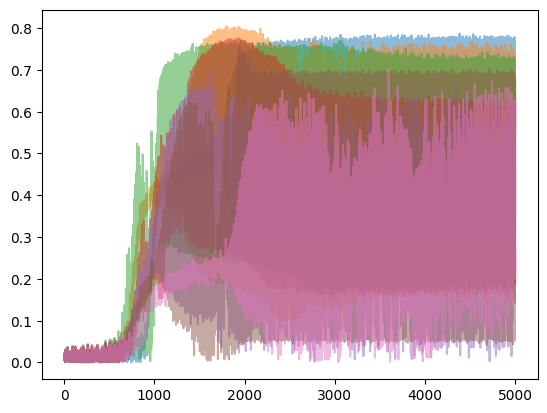

In [221]:
for i, r in enumerate(rsm.values()):
    if i>4: 
        plt.plot(t,r,alpha=0.5)

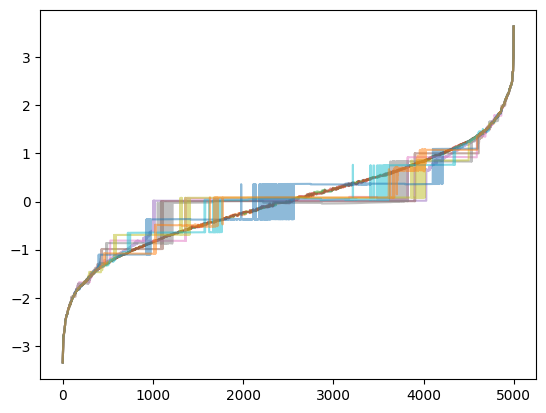

In [220]:
for avg_omega in avgs.values():
    plt.plot(avg_omega,alpha=0.5)

In [28]:
seed =10
N = 1000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega -= np.mean(omega)
omega = np.sort(omega)
init_dtheta = np.zeros_like(omega)
m = 10
t = np.arange(0,5000,0.1)
KcS = get_Kc1_S(m,omega)
K = KcS
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= np.zeros_like(theta_random),p_omega=omega)
theta, dtheta,rs_1 = mf2(K,N=N,m=m,t_array=t,p_theta= np.ones_like(theta_random),p_dtheta= np.zeros_like(theta_random),p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

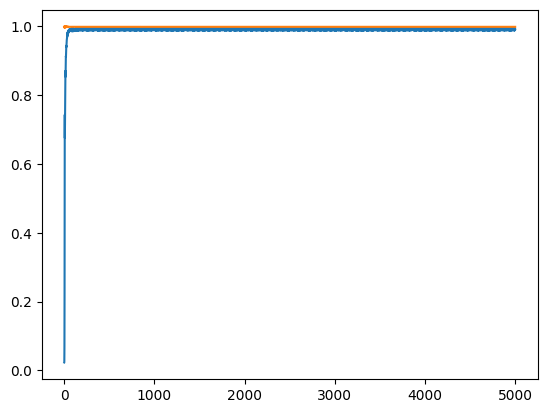

In [29]:
plt.plot(t,rs,t,rs_1)

In [35]:
def KUT(v,d):
    frame = 0
    h = frame - d*np.sin(5*np.pi/180)
    m = 0.275
    g = 9.81
    U = m*g*h
    K = 0.5*v**2*m
    T = U+K
    print(h)
    print(K,U,T)

In [37]:
KUT(0,-0.173)

0.015077943495344862
0.0 0.04067652206456661 0.04067652206456661


In [36]:
KUT(0,0)
KUT(-0.67,0.27)
KUT(0.41,0.42)

0.0
0.0 0.0 0.0
-0.023532050541867706
0.061723750000000015 -0.06348358934932362 -0.001759839349323604
-0.036605411954016426
0.02311375 -0.09875225009894784 -0.07563850009894783


In [ ]:
8, 
4, 이론 내용 부족, 및 실험 분석 및 계산 실수
10
10
6, 그래프 없음, 이론 부족 및 폰트 통일, 날자 안맞춤
6, 오차가 난 이유 잘못 분석, 실험에 대한 전반적인 내용 해석 부족, 이론 내용 부족, 처음 각도가 잘못됨
2, 내용 부족, 양식 안지킴, 
8, 나열형지양, 날자, 분석은 잘함, 
8, 실험 식은 따로 빼고, 결과 부분에 표 넣기, 토의는 잘함
10
8, 이론 부족, 단위 없음
10
6, 전체적인 분석 없음, 양식 날자 안지킴, 질문 1답 요지가 다름
4, 이론 부족, 계산시 실험 유효숫자 고려 안함, 현실세계에서도 역학적 에너지 보존 법칙은 존재하지만, 여러 요인으로 인해 운동에너지 
2, 내용 부족, 남이 보이는 글임.분석도 잘못됨
9, 날자 잘못됨